<a href="https://colab.research.google.com/github/KenDaupsey/Binary-Classification-Model-Comparison/blob/main/Binary_Classification_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Binary Classification Model Comparison ***

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [3]:
### Import Diabetes dataset
url= "https://raw.githubusercontent.com/KenDaupsey/Machine-Learning-Logistic-Regression-Diabetes-Dataset-/main/Diabetes%7EBest%7Edataset.csv"
df= pd.read_csv(url)
df.head()

,serial_no,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['serial_no', 'pregnancies', 'glucose', 'bloodpressure', 'skinthickness',
       'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
serial_no,768.0,384.500000,221.846794,1.000,192.75000,384.5000,576.25000,768.00
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   serial_no                 768 non-null    int64  
 1   pregnancies               768 non-null    int64  
 2   glucose                   768 non-null    int64  
 3   bloodpressure             768 non-null    int64  
 4   skinthickness             768 non-null    int64  
 5   insulin                   768 non-null    int64  
 6   bmi                       768 non-null    float64
 7   diabetespedigreefunction  768 non-null    float64
 8   age                       768 non-null    int64  
 9   outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [7]:
# Select features and target variable
features = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age']
target = 'outcome'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
df.shape

(768, 10)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [10]:
# Standardize features (important for some algorithms like SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Create a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy'])

In [12]:
results

,Model,Accuracy


In [13]:
# Train and evaluate each model
results = []
for model_name, model in models.items():
    # Some models require standardized features
    if model_name in ['SVM', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Increase max_iter for Logistic Regression
        if model_name == 'Logistic Regression':
            model.set_params(max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                 Model  Accuracy
0        Random Forest  0.720779
1    Gradient Boosting  0.740260
2  Logistic Regression  0.746753
3                  SVM  0.733766
4  K-Nearest Neighbors  0.694805
5        Decision Tree  0.746753
6          Naive Bayes  0.766234


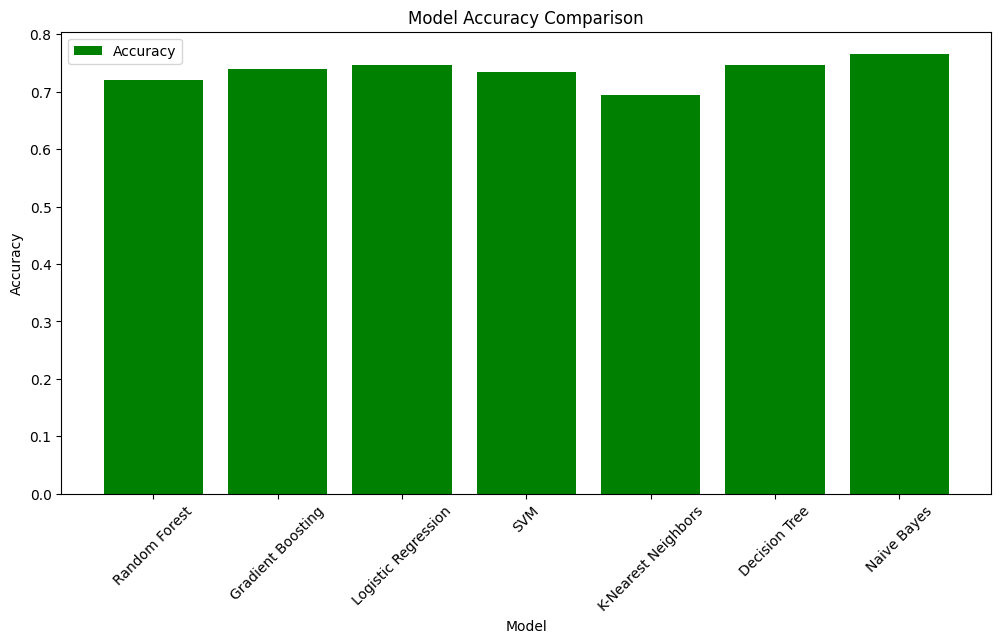

In [14]:
import matplotlib.pyplot as plt

# Assuming 'results' is a DataFrame, if not, convert it to a DataFrame
results = pd.DataFrame(results)

# Plot the accuracy scores
plt.figure(figsize=(12, 6))
plt.bar(results['Model'], results['Accuracy'], color='green', label='Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [15]:
# Display classification reports
for model_name, model in models.items():
    print(f"\nClassification Report for {model_name}:\n")
    if model_name in ['SVM', 'K-Nearest Neighbors']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75

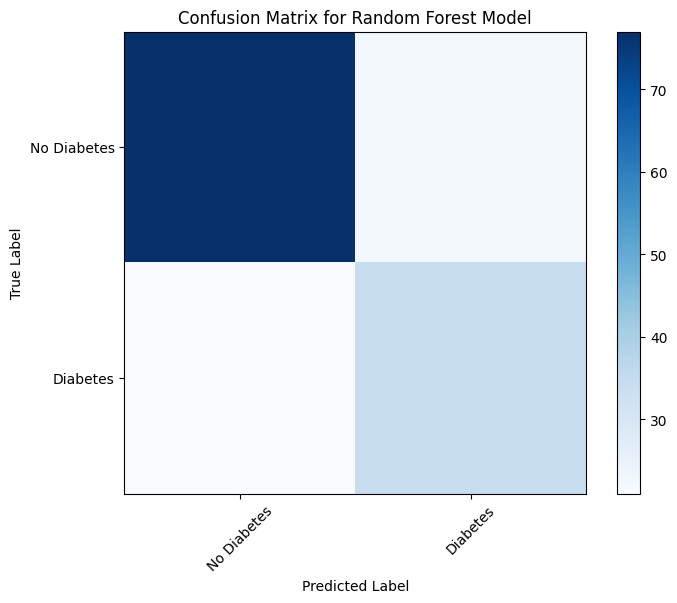

In [16]:
# Display confusion matrix for the selected model (Random Forest)
selected_model = RandomForestClassifier(n_estimators=100, random_state=42)
selected_model.fit(X_train, y_train)
y_pred_selected = selected_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_selected)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Model')
plt.colorbar()

class_names = ['No Diabetes', 'Diabetes']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

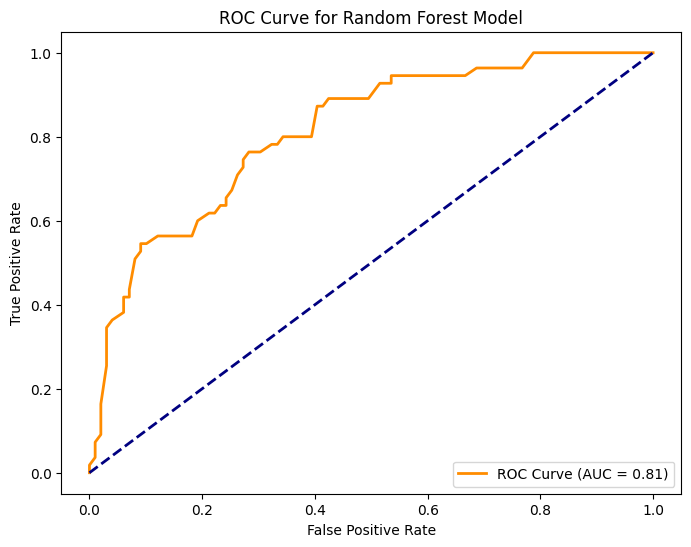

In [17]:
# ROC Curve for the selected model (Random Forest)
y_prob = selected_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()

*** Binary Classification Model Comparison ~ Entire Code ***

                 Model  Accuracy
0        Random Forest  0.720779
1    Gradient Boosting  0.740260
2  Logistic Regression  0.746753
3                  SVM  0.733766
4  K-Nearest Neighbors  0.694805
5        Decision Tree  0.746753
6          Naive Bayes  0.766234


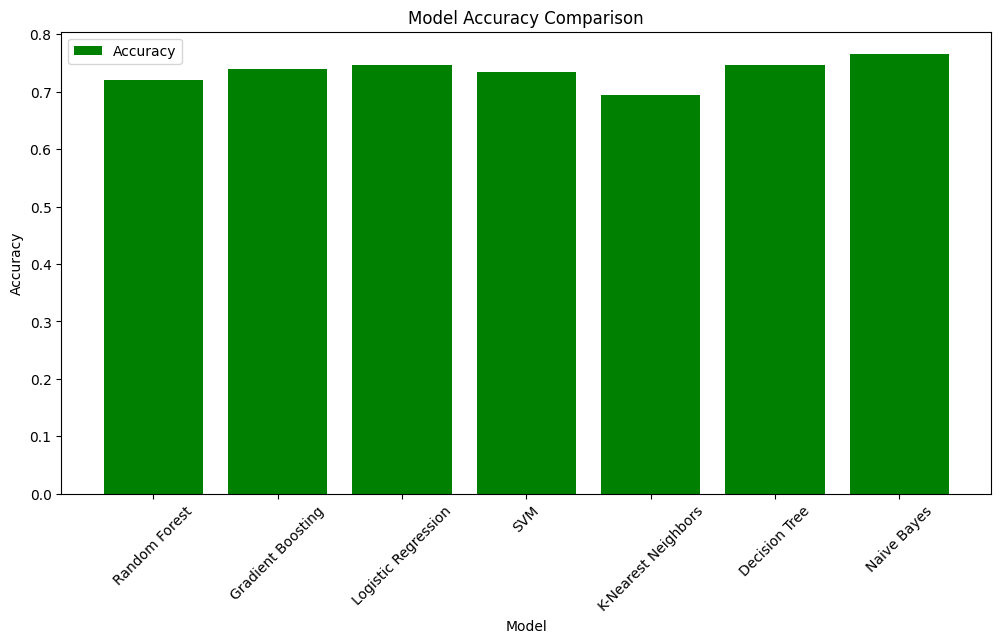


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

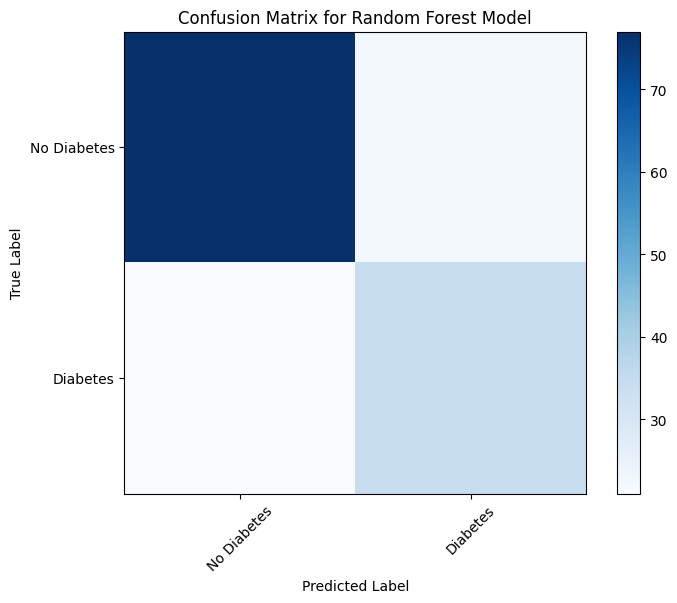

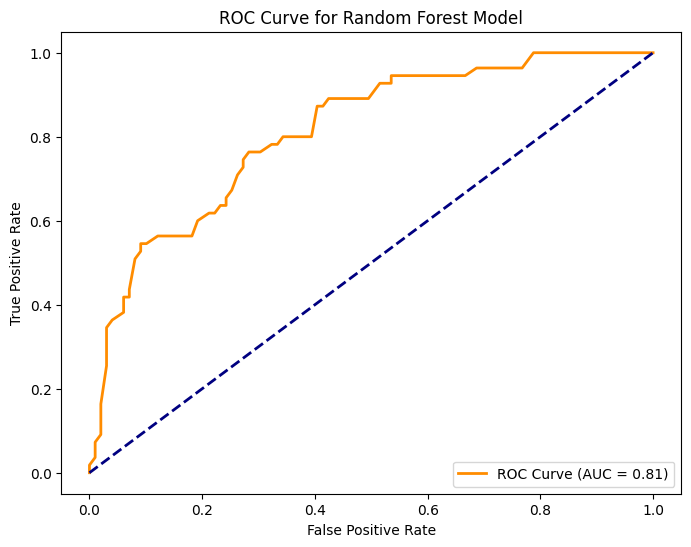

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Import Diabetes dataset
url= "https://raw.githubusercontent.com/KenDaupsey/Machine-Learning-Logistic-Regression-Diabetes-Dataset-/main/Diabetes%7EBest%7Edataset.csv"
df= pd.read_csv(url)
df.head()

# Select features and target variable
features = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age']
target = 'outcome'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for some algorithms like SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Create a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy'])

# Train and evaluate each model
results = []
for model_name, model in models.items():
    # Some models require standardized features
    if model_name in ['SVM', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Increase max_iter for Logistic Regression
        if model_name == 'Logistic Regression':
            model.set_params(max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot the accuracy scores
#import matplotlib.pyplot as plt

# Assuming 'results' is a DataFrame, if not, convert it to a DataFrame
results = pd.DataFrame(results)

# Plot the accuracy scores
plt.figure(figsize=(12, 6))
plt.bar(results['Model'], results['Accuracy'], color='green', label='Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


# Display classification reports
for model_name, model in models.items():
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, model.predict(X_test)))
# Display confusion matrix for the selected model (Random Forest)
selected_model = RandomForestClassifier(n_estimators=100, random_state=42)
selected_model.fit(X_train, y_train)
y_pred_selected = selected_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_selected)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Model')
plt.colorbar()

class_names = ['No Diabetes', 'Diabetes']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# ROC Curve for the selected model (Random Forest)
y_prob = selected_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()